## Equations différentielles

La librairie ``scipy.integrate`` contient des fonctions pour résoudre les équations différentielles ordinaires, c'est à dire des équations de la forme:

$$\frac{dy}{dt} = f(t, y)$$
    
avec conditions initiales (on connait $y$ à l'instant $t_0$). La variable $y$ peut être un tableau numpy.

On utilise la fonction ``solve_ivp`` (remplace ``ode`` ou ``odeint``): 

    def solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, ...)
    
Il existe plusieurs méthodes d'intégration (par défaut Runge-Kutta d'ordre 5(4) qui adapte la taille des pas)

La fonction ``solve_ivp`` renvoie un objet (dictionnaire) qui le résultat (res.y) mais aussi d'autres informations sur la convergence de l'algorithme.

Exemple : 
$$\frac{dy}{dt} = -y$$    



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
# Solve initial value problem

In [2]:
# Ordre 1
def f(t, y):
    return -y

res = solve_ivp(f, t_span=[0, 4], y0=[1], t_eval=np.linspace(0, 4, 21))

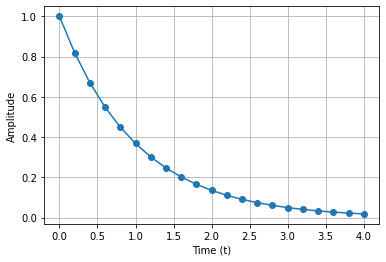

In [3]:
plt.plot(res.t, res.y[0], '-o')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid()

## Equations différentielles d'ordre élevé

L'astuce consiste à augmenter la dimension de $y$ en rajoutant des fonctions intermédiaires qui sont les dérivées de la fonction initiale.

Par exemple l'équation 

$$\frac{d^2y}{dt^2} = \frac{f(y)}{m}$$

devient 

$$\frac d{dt} \begin{pmatrix}
y \\ 
y ^\prime
\end{pmatrix} = \begin{pmatrix}
y ^\prime \\
f(y)/m
\end{pmatrix} = F(y, y^\prime)$$


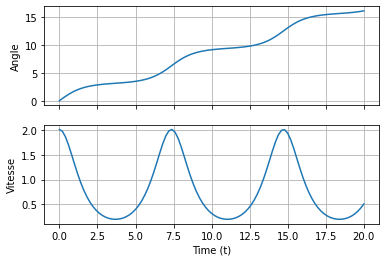

In [10]:
def f(t, Y):
    y, v = Y
    a = -np.sin(y)
    return [v, a]

y0 = [0, 2.01]

res = solve_ivp(f, t_span=[0, 20], y0=y0, t_eval=np.linspace(0, 20, 101), rtol=1E-7, atol=1E-7)

fig = plt.figure()
ax1, ax2 = fig.subplots(2, 1, sharex=True)
ax1.plot(res.t, res.y[0])
ax2.plot(res.t, res.y[1])

ax2.set_xlabel('Time (t)')
ax1.set_ylabel('Angle')
ax2.set_ylabel('Vitesse')

ax1.grid()
ax2.grid()